## 1 - Generating Synthetic World Population using Walker Alias Method

In this notebook, I generate synthetic world populations based on statistic information of population per country from 2019. I used Walker's Alias method.<br><br>
First, I amend the code for Walker Alias Method (as it was originally written for Python 2), then create a synthetic world population and finally compare the two.



### Walker's Alias method implementation

Code for the Walkerradnom class amended from: <br>
https://code.activestate.com/recipes/576564-walkers-alias-method-for-random-objects-with-diffe/ <br>


In [ ]:
from __future__ import division
import random

__author__ = "Maciej Tarsa, Denis Bzowy"
__version__ = "4Sept2021"

In [ ]:
class Walkerrandom:
  """ Walker's alias method for random objects with different probablities
  """

  def __init__( self, weights, keys=None ):
    """ builds the Walker tables prob and inx for calls to random().
        The weights (a list or tuple or iterable) can be in any order;
        they need not sum to 1.
    """
    n = self.n = len(weights)
    self.keys = keys
    sumw = sum(weights)
    prob = [w * n / sumw for w in weights]  # av 1
    inx = [-1] * n
    short = [j for j, p in enumerate( prob ) if p < 1]
    long = [j for j, p in enumerate( prob ) if p > 1]
    while short and long:
        j = short.pop()
        k = long[-1]
        # assert prob[j] <= 1 <= prob[k]
        inx[j] = k
        prob[k] -= (1 - prob[j])  # -= residual weight
        if prob[k] < 1:
            short.append( k )
            long.pop()
    self.prob = prob
    self.inx = inx

  def __str__( self ):
    """ e.g. "Walkerrandom prob: 0.4 0.8 1 0.8  inx: 3 3 -1 2" """
    probstr = " ".join([ "%.2g" % x for x in self.prob ])
    inxstr = " ".join([ "%.2g" % x for x in self.inx ])
    return "Walkerrandom prob: %s  inx: %s" % (probstr, inxstr)

#...............................................................................
  def random( self ):
    """ each call -> a random int or key with the given probability
        fast: 1 randint(), 1 random.uniform(), table lookup
    """
    u = random.uniform( 0, 1 )
    j = random.randint( 0, self.n - 1 )  # or low bits of u
    randint = j if u <= self.prob[j] \
        else self.inx[j]
    return list(self.keys)[randint]

## Synthetic countries population

Data for country populations taken from:<br>
https://data.worldbank.org/indicator/SP.POP.TOTL


Some data preparation has been done using Excel - as most of it was easiest to do via the visual method:
- removal of region totals
- removal of first two rows containing metadata
- removal of all year fields apart from 2019
- removal of Eritrea, as it only contained data up to 2011

In [ ]:
# import data into pandas
import pandas as pd
input = pd.read_csv('./population.csv')
input = input.rename(columns={"Country Name": "Country_name", "Country Code": "Country_code", "2019": "Real_pop"})
input.head()

,Country_name,Country_code,Real_pop
0,China,CHN,1397715000
1,India,IND,1366417754
2,United States,USA,328239523
3,Indonesia,IDN,270625568
4,Pakistan,PAK,216565318


In [ ]:
# sum the total population
real_total = input['Real_pop'].sum()
print(real_total)

7656340905


In [ ]:
# create a new row for percentage of total population
input['Real_perc'] = input['Real_pop']/real_total
input.head()

,Country_name,Country_code,Real_pop,Real_perc
0,China,CHN,1397715000,0.182557
1,India,IND,1366417754,0.178469
2,United States,USA,328239523,0.042872
3,Indonesia,IDN,270625568,0.035347
4,Pakistan,PAK,216565318,0.028286


Now I can use this data for generation of synthetic records using Walker's Alias method

In [ ]:
# number of records to generate
# the same number as real records could be used
#Nrand = real_total
# or a smaller value, e.g. 1 million
Nrand = 1000000


from datetime import datetime
import time as t
start_ts = t.time()
now_start = datetime.now()
print(f"Starting generation on {now_start.strftime('%d/%m/%Y %H:%M:%S')}")
print()

print(Nrand, "Walker Random individuals")

# set up the 'buckets' for walker's alias method
wrand = Walkerrandom(input['Real_pop'], input['Country_code'])
from collections import defaultdict
nrand = defaultdict(int)
# sample randomly from the distribution
for _ in range(Nrand):
  j = wrand.random()
  # sum the records for each country
  # here we could be creating a record for each generated 'person'
  nrand[j] += 1
  
# print the totals per country
s = str(sorted(nrand.items()))
print()
now_end = datetime.now()
print(f"Generation finished at {now_end.strftime('%d/%m/%Y %H:%M:%S')}")
print(f"Running time: {(t.time()-start_ts)/60} minutes")
print(s)


Starting generation on 04/09/2021 18:56:12

1000000 Walker Random individuals

Generation finished at 04/09/2021 18:56:33
Running time: 0.3366214354832967 minutes
[('ABW', 16), ('AFG', 4891), ('AGO', 4138), ('ALB', 365), ('AND', 12), ('ARE', 1246), ('ARG', 5844), ('ARM', 356), ('ASM', 7), ('ATG', 10), ('AUS', 3220), ('AUT', 1219), ('AZE', 1366), ('BDI', 1505), ('BEL', 1466), ('BEN', 1511), ('BFA', 2715), ('BGD', 21216), ('BGR', 936), ('BHR', 221), ('BHS', 48), ('BIH', 426), ('BLR', 1203), ('BLZ', 46), ('BMU', 7), ('BOL', 1502), ('BRA', 27500), ('BRB', 46), ('BRN', 68), ('BTN', 116), ('BWA', 321), ('CAF', 663), ('CAN', 4868), ('CHE', 1159), ('CHI', 24), ('CHL', 2532), ('CHN', 182566), ('CIV', 3354), ('CMR', 3370), ('COD', 11237), ('COG', 722), ('COL', 6654), ('COM', 104), ('CPV', 87), ('CRI', 680), ('CSS', 922), ('CUB', 1504), ('CUW', 19), ('CYM', 4), ('CYP', 143), ('CZE', 1381), ('DEU', 10818), ('DJI', 128), ('DMA', 8), ('DNK', 775), ('DOM', 1393), ('DZA', 5697), ('ECU', 2334), ('EGY',

In [ ]:
# create a dictionary out of the result
df = pd.DataFrame.from_dict(nrand, orient='index', columns=['Synth_pop'])
df['Country_code'] = df.index
# merge with the input data
output = pd.merge(df,input,left_on=['Country_code'], right_on = ['Country_code'], how = 'left')
synth_total = output['Synth_pop'].sum()
# calculate frequencies
output['Synth_perc'] = output['Synth_pop']/synth_total
output['Diff'] = abs(output['Real_perc']-output['Synth_perc'])
# print end data
output

,Synth_pop,Country_code,Country_name,Real_pop,Real_perc,Synth_perc,Diff
0,35291,IDN,Indonesia,270625568,0.035347,0.035291,5.559328e-05
1,4004,GHA,Ghana,30417856,0.003973,0.004004,3.110271e-05
2,178070,IND,India,1366417754,0.178469,0.178070,3.987713e-04
3,1366,AZE,Azerbaijan,10023318,0.001309,0.001366,5.684748e-05
4,27500,BRA,Brazil,211049527,0.027565,0.027500,6.532521e-05
...,...,...,...,...,...,...,...
212,6,MNP,Northern Mariana Islands,57216,0.000007,0.000006,1.473021e-06
213,2,TCA,Turks and Caicos Islands,38191,0.000005,0.000002,2.988153e-06
214,1,VGB,British Virgin Islands,30030,0.000004,0.000001,2.922239e-06
215,2,TUV,Tuvalu,11646,0.000002,0.000002,4.789079e-07


In [ ]:
print(f"Smallest difference {output['Diff'].min()}")
print(f"Biggest difference {output['Diff'].max()}")
print(f"Average difference {output['Diff'].mean()}")

Smallest difference 3.653240215797334e-08
Biggest difference 0.00039877130401236305
Average difference 3.075421686554864e-05


Let's try plotting the values to see whether they are correlated.

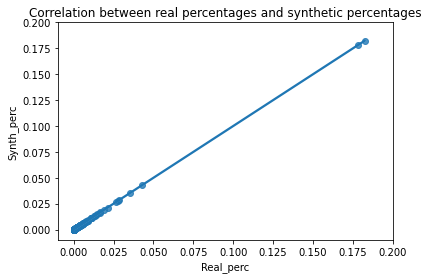

In [ ]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlim(-0.01, 0.2)
ax.set_ylim(-0.01, 0.2)
ax.set_title('Correlation between real percentages and synthetic percentages') 
# use the function regplot to make a scatterplot
sns.regplot(x=output['Real_perc'], y=output['Synth_perc'])

There is an obvious correlation, therefore I conclude that the method generated a realistic populatons based on given frequencies.

Visual inspection indicates the spread of the population to be similar for the real population compared to the synthetically generated.